# Лабораторная работа №1

## 10 вариант
2.1.2, 2.3.5, 2.4.2, 2.5.2, 2.6.2




In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp

## Задание 10.1

Промоделировать стационарные процессы теплопроводности стержня в зависимости от  входных  данных  задачи:  
-d/dx(K(x)du/dx)=f, u(a)=UA, u(b)=UB

| k(x) | f(x)     | a   | UA | b   | UB |
|:-----|:--------:|:----|:---|:----|:---|
| x    | sqrt(x)+4|0.5  | 0  | 1.5 | 5  |


In [2]:
x, y, c, c1, c2 = sp.symbols("x y c c1 c2")
kx = x
fx = sp.sqrt(x)+4
a = 0.5
ua = 0
b = 1.5
ub = 5

In [3]:
C = (1, 2, 0.1, 1, 1, 1, 1)
Kx = (kx, c*kx, c*kx, 1/kx, kx, kx, kx)
UA = (ua, ua, ua, ua, -ua, ua, -ua)
UB = (ub, ub, ub, ub, ub, -ub, ub)

In [4]:
def Integrate(k, F):
    f1 = sp.integrate(F, x)
    f2 = -sp.integrate(f1 / k, x) + sp.integrate(c1 / k, x) + c2
    return f2
    
def solve1(F, a, ua, b, ub, C):
    f1 = sp.Eq(F.subs([(x, a), (c, C)]), ua)
    f2 = sp.Eq(F.subs([(x, b), (c, C)]), ub)
    return sp.solve([f1, f2])
    
res = Integrate(Kx[0], fx)
m = solve1(res, a, UA[0], b, UB[0], 1)
print("Решение уравнения ", res.subs([(c1, m[c1]), (c2, m[c2])]))

Решение уравнения  -4*x**(3/2)/9 - 4*x + 8.79232996053091*log(x) + 8.25151356295842


In [5]:
# Изменяя значения параметра с в коэффициенте теплопроводности,
# найти решения задачи для наборов параметров 1-3
solvs = []
for i in range(3):
    res = Integrate(Kx[i], fx)
    m = solve1(res, a, UA[i], b, UB[i], C[i])
    solvs.append(res.subs([(c1, m[c1]), (c2, m[c2]), (c, C[i])]))
    print("Для набора ", i + 1, " решение:\n", solvs[i])

Для набора  1  решение:
 -4*x**(3/2)/9 - 4*x + 8.79232996053091*log(x) + 8.25151356295842
Для набора  2  решение:
 -2*x**(3/2)/9 - 2*x + 6.67176304683254*log(x) + 5.70308116540785
Для набора  3  решение:
 -4.44444444444444*x**(3/2) - 40.0*x + 46.9625344071014*log(x) + 54.1232967188686


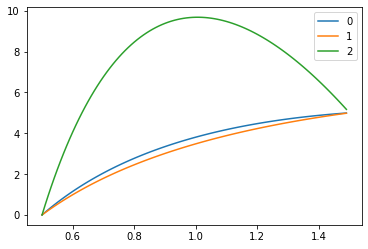

In [6]:
# На одном чертеже построить графики найденных решений. Cравнить
# полученные результаты.

valuesx = np.arange(a, b, 0.01)

for i in range(3):
    np_solve = sp.lambdify(x, solvs[i], "numpy")
    plt.plot(valuesx, np_solve(valuesx), label = i)
plt.legend()

Решение уравнения 4:  -4*x**(7/2)/21 - 4*x**3/3 + 5.05191672317127*x**2 - 1.07947663838361


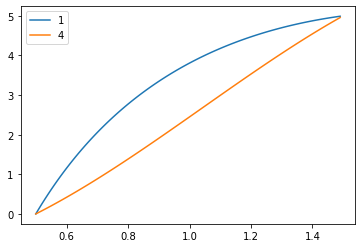

In [7]:
# Аналогично п.2, найти аналитическое решение для набора параметров 4.
# На одном чертеже построить графики решений для наборов 1 и 4. Cравнить
# полученные результаты.

res = Integrate(Kx[3], fx)
m = solve1(res, a, UA[3], b, UB[3], C[3])
solvs.append(res.subs([(c1, m[c1]), (c2, m[c2]), (c, C[3])]))
print("Решение уравнения 4: ", solvs[3])

np_solve1 = sp.lambdify(x, solvs[0], "numpy")
np_solve4 = sp.lambdify(x, solvs[3], "numpy")

plt.plot(valuesx, np_solve1(valuesx), label = 1)
plt.plot(valuesx, np_solve4(valuesx), label = 4)
plt.legend()

Для набора  5  решение:
 -4*x**(3/2)/9 - 4*x + 8.79232996053091*log(x) + 8.25151356295842
Для набора  6  решение:
 -4*x**(3/2)/9 - 4*x - 0.310062305737467*log(x) + 1.94221602724384
Для набора  7  решение:
 -4*x**(3/2)/9 - 4*x + 8.79232996053091*log(x) + 8.25151356295842


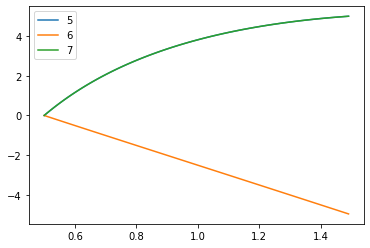

In [8]:
for i in range(3):
    res = Integrate(Kx[i+4], fx)
    m = solve1(res, a, UA[i+4], b, UB[i+4], C[i+4])
    solve = res.subs([(c1, m[c1]), (c2, m[c2]), (c, C[i])])
    print("Для набора ", i + 5, " решение:\n", solve)
    np_solve = sp.lambdify(x, solve, "numpy")
    plt.plot(valuesx, np_solve(valuesx), label = i + 5)
    
plt.legend()    
# Прим. графики 6 и 7 одинаковы, так как ua = 0

## Задание 10.2  


Найти приближенное решение краевой задачи методом конечных разностей:

In [9]:
p = sp.sin(2 * x)
q = 8 * (1 + sp.sin(x) ** 2)
f = 10 * sp.cos(x)
a, b = 1., 3.
UA, UB = 0, 0
E = 0.05
h = 0.1

px = sp.lambdify(x, p, "numpy")
qx = sp.lambdify(x, q, "numpy")
fx = sp.lambdify(x, f, "numpy")

In [10]:
def get_matrixA(H):
    def xi(i):
        return a + H * i

    k = int((b-a)/H) + 1

    res = np.zeros((k, k), dtype=float)

    res[0, 0] = 1
    for i in range(1, k-1):
        res[i, i-1] = (1 / H**2) + qx(xi(i)) - (px(xi(i)) / H)
        res[i, i] = (px(xi(i)) / H) - (2 / H**2)
        res[i, i+1] = 1 / H**2
    res[-1, -1] = 1

    return res

In [11]:
def get_matrixB(H):
    n = int((b-a) / H) + 1
    
    res = np.zeros(n, dtype=float)
    
    res[0] = a
    for i in range(1, int(n)-1):
        res[i] = fx(H*i+a)
    res[-1] = b
    
    return res

In [12]:
def solve(H):
    A = get_matrixA(H)
    B = get_matrixB(H)
    res = np.linalg.solve(A, B)
    
    return res

Step=7


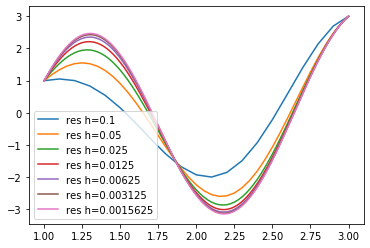

2


In [13]:
h = 0.2
step = 1
while True: 
    res1 = solve(h)
    res2 = solve(h/2)
    dif = []
    for i in range(len(res1)):
        dif.append(abs(res1[i] - res2[i*2]))
        
    if max(dif) < E:
        print("Step=",step, sep='')
        h = h / 2
        break
    
    h = h / 2
    step = step+1
    valuesx = np.arange(a, b+h, h)
    plt.plot(valuesx, res2, label=f'res h={h}')
    
valuesx = np.arange(a, b+h, h)
plt.plot(valuesx, res2, label=f'res h={h}')
plt.legend()
plt.show()
print("2")

## Задание 10.3  


Задание 10.3.5 Методом конечных разностей найти приближенное
решение указанной в индивидуальном варианте краевой задачи c
точностью E и построить его график. Решение системы разностных
уравнений найти,используя метод прогонки.

In [14]:
E = 0.1
p = -1.
q = 2. * x**2
f = x + 1
a, b = 1.3, 2.4
c = [1., 0., 1.]
d = [1., 1., 1.]
h = 0.2

px = sp.lambdify(x, p, "numpy")
qx = sp.lambdify(x, q, "numpy")
fx = sp.lambdify(x, f, "numpy")

In [15]:
def TDMAsolver(a, b, c, d):
    nf = len(d) 
    ac, bc, cc, dc = map(np.array, (a, b, c, d))
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]
        
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [16]:
def get_diagonales(H):
    def xi(i):
        return i*H + a

    k = int((b-a)/H) + 1
    aa = np.zeros(k - 1, dtype=float)
    bb = np.zeros(k, dtype=float)
    cc = np.zeros(k - 1, dtype=float)
    dd = np.zeros(k, dtype=float)

    bb[0] = 1
    dd[0] = 1
    for i in range(1, k-1):
        aa[i-1] = (1 / H**2) + qx(xi(i)) - (px(xi(i)) / H)
        bb[i] = (px(xi(i)) / H) - (2 / H**2)
        cc[i] = 1 / H**2
        dd[i] = fx(xi(i))
    aa[-1] = 1
    bb[-1] = 1 + 1 / H
    dd[-1] = 3.2
    
    return aa, bb, cc, dd

In [17]:
def solve(H):
    A, B, C, D = get_diagonales(H)
    return TDMAsolver(A, B, C, D)

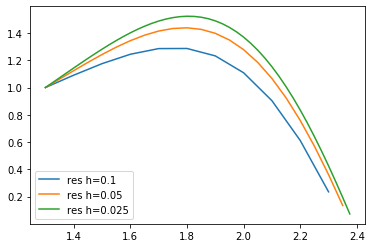

In [18]:
h = 0.2
step = 1
while True: 
    res1 = solve(h)
    res2 = solve(h/2)
    dif = []
    for i in range(len(res1)):
        dif.append(abs(res1[i] - res2[i*2]))
        
    if max(dif) < E:
        h = h / 2
        break
    
    h = h / 2
    valuesx = np.arange(a, b, h)
    plt.plot(valuesx, res2, label=f'res h={h}')
    step = step+1
    

valuesx = np.arange(a, b, h)
plt.plot(valuesx, res2, label=f'res h={h}')
plt.legend()

## Задание 10.4

2.4.2 Промоделировать стационарные процессы
теплопроводности стержня в зависимости от входных данных задачи –
переменного коэффициента теплопроводности k(x) и плотности
источников тепла f(x)

## Задние 10.5

2.5.2 Методом конечных разностей найти приближенное решение  краевой задачи с тремя верными значащими цифрами. Решение системы разностных уравнений найти, используя метод прогонки

In [19]:
a = 0
b = 1.8
c = 1.515
k = (0.4, 1.4)
q = (3.2, 12)
f = 8 * x * (2 - x**2)
h = 0.1

def kx(x):
    return k[0] if x < c and x > a else k[1]

def qx(x):
    return q[0] if x < c and x > a else q[1]

fx = sp.lambdify(x, f, "numpy")

In [20]:
def get_diagonales(H):
    def xi(i):
        return a + i * H

    n = int((b - a) / H)

    aa = np.zeros(n-1, dtype=float)
    bb = np.zeros(n, dtype=float)
    cc = np.zeros(n-1, dtype=float)
    dd = np.zeros(n, dtype=float)

    bb[0] = kx(a) / H + 1/2
    cc[0] = -kx(a) / H
    dd[0] = 0
    for i in range(1, n-1):
        aa[i-1] = (1 / H**2) + qx(xi(i)) - (kx(xi(i)) / H)
        bb[i] = (kx(xi(i)) / H) - (2 / H**2)
        cc[i] = 1 / H**2
        dd[i] = fx(xi(i))
    aa[-1] = -kx(b) / H
    bb[-1] = kx(b) / H + 1/2
    dd[-1] = 0

    return aa, bb, cc, dd


[10.03801699 10.03819204 10.03836701 ... -3.27687416 -3.27681707
 -3.27675993]
Step=11


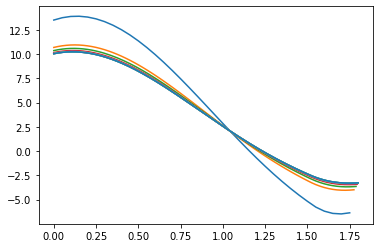

In [23]:
h=0.1
step = 1
while True: 
    res1 = solve(h)
    res2 = solve(h/2)
    dif = []
    for i in range(len(res1)):
        dif.append(abs(res1[i] - res2[i*2]))
        
    if max(dif) < 0.001:
        print(res2, "\nStep=",step, sep='')
        h = h / 2
        break
    
    h = h / 2
    valuesx = np.arange(a, b, h)
    plt.plot(valuesx, res2, label=f'res h={h}')
    step = step+1
    

valuesx = np.arange(a, b, h)
plt.plot(valuesx, res2, label=f'res h={h}')
#plt.legend()
plt.show()

## Задание 6

2.6.2. Промоделировать нестационарные процессы
теплопроводности в зависимости от входных данных задачи -
коэффициента теплопроводности k(x) и начальной температуры phi (x)